In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
from sklearn import datasets as toy_data
from torch.utils.data import Dataset, DataLoader


In [2]:
x1,y1 = toy_data.make_moons(n_samples=30)


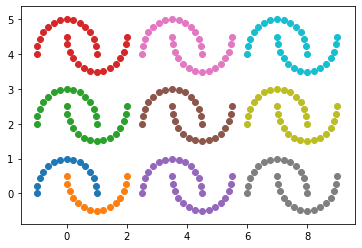

In [3]:
# x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
# x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )




# x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
# x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

# x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

# x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

# x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

# x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

# x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

# x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))



x2,_ = toy_data.make_moons(n_samples=30) 
x2[:,1] = x2[:,1] + 2

x3,_ = toy_data.make_moons(n_samples=30) 

x3[:,1] = x3[:,1] + 4


x4,_ = toy_data.make_moons(n_samples=30)
x4[:,0] = x4[:,0] + 3.5

x5,_ = toy_data.make_moons(n_samples=30)
x5[:,0] = x5[:,0] + 3.5
x5[:,1] = x5[:,1] + 2

x6,_ = toy_data.make_moons(n_samples=30)
x6[:,0] = x6[:,0] + 3.5
x6[:,1] = x6[:,1] + 4

x7,_ = toy_data.make_moons(n_samples=30)
x7[:,0] = x7[:,0] +7

x8,_ = toy_data.make_moons(n_samples=30)
x8[:,0] = x8[:,0] + 7
x8[:,1] = x8[:,1] + 2

x9,_ = toy_data.make_moons(n_samples=30)
x9[:,0] = x9[:,0] + 7
x9[:,1] = x9[:,1] + 4

plt.scatter(x1[y1==0,0],x1[y1==0,1])
plt.scatter(x1[y1==1,0],x1[y1==1,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])



In [4]:
# y11  = np.zeros(15)
# y12 = np.ones(15)

Y2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    y2 = np.ones(30)
    y2[idx] = 0 
    Y2_.append(y2)

Y2_ = np.concatenate(Y2_,axis=0)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
X_train = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9))

Y_train = np.concatenate((y1,Y2_))



In [6]:
X_train.shape,Y_train.shape

((270, 2), (270,))

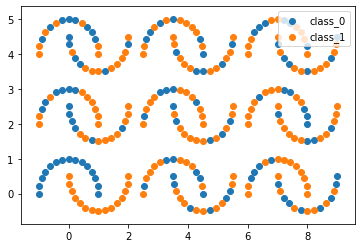

In [7]:
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],label = "class_0")
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],label = "class_1")
plt.legend()


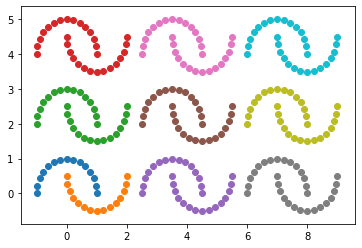

In [8]:
# x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
# x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )
xt1,yt1 = toy_data.make_moons(n_samples=30)

# x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
# x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

# x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

# x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

# x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

# x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

# x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

# x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))



x2,_ = toy_data.make_moons(n_samples=30) 
x2[:,1] = x2[:,1] + 2

x3,_ = toy_data.make_moons(n_samples=30) 

x3[:,1] = x3[:,1] + 4


x4,_ = toy_data.make_moons(n_samples=30)
x4[:,0] = x4[:,0] + 3.5

x5,_ = toy_data.make_moons(n_samples=30)
x5[:,0] = x5[:,0] + 3.5
x5[:,1] = x5[:,1] + 2

x6,_ = toy_data.make_moons(n_samples=30)
x6[:,0] = x6[:,0] + 3.5
x6[:,1] = x6[:,1] + 4

x7,_ = toy_data.make_moons(n_samples=30)
x7[:,0] = x7[:,0] +7

x8,_ = toy_data.make_moons(n_samples=30)
x8[:,0] = x8[:,0] + 7
x8[:,1] = x8[:,1] + 2

x9,_ = toy_data.make_moons(n_samples=30)
x9[:,0] = x9[:,0] + 7
x9[:,1] = x9[:,1] + 4
plt.scatter(xt1[yt1==0,0],xt1[yt1==0,1])
plt.scatter(xt1[yt1==1,0],xt1[yt1==1,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])

# yt11  = np.zeros(15)
# yt12 = np.ones(15)

Yt2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    yt2 = np.ones(30)
    yt2[idx] = 0 
    Yt2_.append(yt2)

Yt2_ = np.concatenate(Yt2_,axis=0)
Y_test = np.concatenate((yt1,Yt2_))
X_test = np.concatenate((xt1,x2,x3,x4,x5,x6,x7,x8,x9))

In [9]:
X_test.shape,Y_test.shape

((270, 2), (270,))

In [10]:
class Grid_data(Dataset):
    def __init__(self,x,y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    
    def __len__(self):
        
        return len(self.x)
    
    
    def __getitem__(self,idx):
        self.dx = self.x[idx,:]
        self.dy = self.y[idx]
        
        self.dx = self.dx
        self.dy = self.dy
        return self.dx, self.dy
        

In [11]:
trainset = Grid_data(X_train,Y_train)


In [12]:
trainloader = DataLoader(trainset,batch_size=10,shuffle = True)

In [13]:
inputs,label = iter(trainloader).next()

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.linear1 = nn.Linear(2,100)
        self.linear2 = nn.Linear(100,100)
        self.linear3 = nn.Linear(100,200)
        self.linear4 = nn.Linear(200,200)
        self.linear5 = nn.Linear(200,400)
#         self.linear6 = nn.Linear(400,600)
#         self.linear7 = nn.Linear(200,200)
#         self.linear8 = nn.Linear(200,100)
        self.linear9 = nn.Linear(400,2)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        #x = F.relu(self.linear6(x))
#         x = F.relu(self.linear7(x))
#         x = F.relu(self.linear8(x))
        x = self.linear9(x)
        
        
        return x

In [15]:
net = Net()
# net(inputs)


In [16]:
net = net.to("cuda")

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)#, momentum=0.9)

In [18]:
loss_curi = []
epochs_nos = 1500
for epoch in range(epochs_nos): # loop over the dataset multiple times
    ep_lossi = []
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/2 ))
            ep_lossi.append(running_loss/2) # loss per minibatch
            running_loss = 0.0
            
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

[1,     2] loss: 0.687
[1,     4] loss: 0.709
[1,     6] loss: 0.633
[1,     8] loss: 0.731
[1,    10] loss: 0.631
[1,    12] loss: 0.690
[1,    14] loss: 0.576
[1,    16] loss: 0.745
[1,    18] loss: 0.688
[1,    20] loss: 0.668
[1,    22] loss: 0.729
[1,    24] loss: 0.716
[1,    26] loss: 0.643
[2,     2] loss: 0.698
[2,     4] loss: 0.682
[2,     6] loss: 0.654
[2,     8] loss: 0.684
[2,    10] loss: 0.679
[2,    12] loss: 0.652
[2,    14] loss: 0.633
[2,    16] loss: 0.574
[2,    18] loss: 0.652
[2,    20] loss: 0.678
[2,    22] loss: 0.736
[2,    24] loss: 0.574
[2,    26] loss: 0.802
[3,     2] loss: 0.710
[3,     4] loss: 0.651
[3,     6] loss: 0.667
[3,     8] loss: 0.645
[3,    10] loss: 0.621
[3,    12] loss: 0.683
[3,    14] loss: 0.715
[3,    16] loss: 0.633
[3,    18] loss: 0.691
[3,    20] loss: 0.672
[3,    22] loss: 0.628
[3,    24] loss: 0.561
[3,    26] loss: 0.672
[4,     2] loss: 0.784
[4,     4] loss: 0.609
[4,     6] loss: 0.631
[4,     8] loss: 0.605
[4,    10] 

[30,    14] loss: 0.648
[30,    16] loss: 0.616
[30,    18] loss: 0.422
[30,    20] loss: 0.568
[30,    22] loss: 0.857
[30,    24] loss: 0.577
[30,    26] loss: 0.557
[31,     2] loss: 0.516
[31,     4] loss: 0.493
[31,     6] loss: 0.664
[31,     8] loss: 0.580
[31,    10] loss: 0.507
[31,    12] loss: 0.440
[31,    14] loss: 0.365
[31,    16] loss: 0.451
[31,    18] loss: 0.560
[31,    20] loss: 0.801
[31,    22] loss: 0.630
[31,    24] loss: 0.617
[31,    26] loss: 0.679
[32,     2] loss: 0.513
[32,     4] loss: 0.543
[32,     6] loss: 0.818
[32,     8] loss: 0.516
[32,    10] loss: 0.486
[32,    12] loss: 0.614
[32,    14] loss: 0.595
[32,    16] loss: 0.528
[32,    18] loss: 0.638
[32,    20] loss: 0.427
[32,    22] loss: 0.463
[32,    24] loss: 0.617
[32,    26] loss: 0.417
[33,     2] loss: 0.425
[33,     4] loss: 0.512
[33,     6] loss: 0.403
[33,     8] loss: 0.643
[33,    10] loss: 0.596
[33,    12] loss: 0.761
[33,    14] loss: 0.403
[33,    16] loss: 0.575
[33,    18] loss

[57,     6] loss: 0.474
[57,     8] loss: 0.522
[57,    10] loss: 0.578
[57,    12] loss: 0.518
[57,    14] loss: 0.593
[57,    16] loss: 0.488
[57,    18] loss: 0.372
[57,    20] loss: 0.501
[57,    22] loss: 0.710
[57,    24] loss: 0.553
[57,    26] loss: 0.576
[58,     2] loss: 0.495
[58,     4] loss: 0.502
[58,     6] loss: 0.617
[58,     8] loss: 0.570
[58,    10] loss: 0.473
[58,    12] loss: 0.368
[58,    14] loss: 0.339
[58,    16] loss: 0.687
[58,    18] loss: 0.514
[58,    20] loss: 0.666
[58,    22] loss: 0.602
[58,    24] loss: 0.633
[58,    26] loss: 0.569
[59,     2] loss: 0.565
[59,     4] loss: 0.470
[59,     6] loss: 0.487
[59,     8] loss: 0.405
[59,    10] loss: 0.573
[59,    12] loss: 0.648
[59,    14] loss: 0.668
[59,    16] loss: 0.393
[59,    18] loss: 0.631
[59,    20] loss: 0.567
[59,    22] loss: 0.519
[59,    24] loss: 0.593
[59,    26] loss: 0.567
[60,     2] loss: 0.312
[60,     4] loss: 0.411
[60,     6] loss: 0.599
[60,     8] loss: 0.522
[60,    10] loss

[83,    22] loss: 0.490
[83,    24] loss: 0.497
[83,    26] loss: 0.488
[84,     2] loss: 0.595
[84,     4] loss: 0.544
[84,     6] loss: 0.465
[84,     8] loss: 0.463
[84,    10] loss: 0.736
[84,    12] loss: 0.513
[84,    14] loss: 0.645
[84,    16] loss: 0.534
[84,    18] loss: 0.484
[84,    20] loss: 0.301
[84,    22] loss: 0.574
[84,    24] loss: 0.510
[84,    26] loss: 0.616
[85,     2] loss: 0.462
[85,     4] loss: 0.632
[85,     6] loss: 0.576
[85,     8] loss: 0.572
[85,    10] loss: 0.481
[85,    12] loss: 0.491
[85,    14] loss: 0.513
[85,    16] loss: 0.496
[85,    18] loss: 0.477
[85,    20] loss: 0.496
[85,    22] loss: 0.713
[85,    24] loss: 0.526
[85,    26] loss: 0.569
[86,     2] loss: 0.491
[86,     4] loss: 0.599
[86,     6] loss: 0.473
[86,     8] loss: 0.536
[86,    10] loss: 0.602
[86,    12] loss: 0.541
[86,    14] loss: 0.629
[86,    16] loss: 0.540
[86,    18] loss: 0.558
[86,    20] loss: 0.503
[86,    22] loss: 0.451
[86,    24] loss: 0.668
[86,    26] loss

[110,    10] loss: 0.555
[110,    12] loss: 0.449
[110,    14] loss: 0.641
[110,    16] loss: 0.659
[110,    18] loss: 0.390
[110,    20] loss: 0.406
[110,    22] loss: 0.531
[110,    24] loss: 0.477
[110,    26] loss: 0.513
[111,     2] loss: 0.513
[111,     4] loss: 0.574
[111,     6] loss: 0.511
[111,     8] loss: 0.419
[111,    10] loss: 0.463
[111,    12] loss: 0.629
[111,    14] loss: 0.605
[111,    16] loss: 0.525
[111,    18] loss: 0.428
[111,    20] loss: 0.550
[111,    22] loss: 0.506
[111,    24] loss: 0.458
[111,    26] loss: 0.517
[112,     2] loss: 0.579
[112,     4] loss: 0.425
[112,     6] loss: 0.489
[112,     8] loss: 0.480
[112,    10] loss: 0.409
[112,    12] loss: 0.524
[112,    14] loss: 0.670
[112,    16] loss: 0.500
[112,    18] loss: 0.521
[112,    20] loss: 0.500
[112,    22] loss: 0.619
[112,    24] loss: 0.609
[112,    26] loss: 0.451
[113,     2] loss: 0.523
[113,     4] loss: 0.391
[113,     6] loss: 0.485
[113,     8] loss: 0.567
[113,    10] loss: 0.563


[136,    24] loss: 0.657
[136,    26] loss: 0.711
[137,     2] loss: 0.597
[137,     4] loss: 0.386
[137,     6] loss: 0.483
[137,     8] loss: 0.508
[137,    10] loss: 0.540
[137,    12] loss: 0.396
[137,    14] loss: 0.620
[137,    16] loss: 0.499
[137,    18] loss: 0.591
[137,    20] loss: 0.392
[137,    22] loss: 0.440
[137,    24] loss: 0.562
[137,    26] loss: 0.636
[138,     2] loss: 0.433
[138,     4] loss: 0.505
[138,     6] loss: 0.698
[138,     8] loss: 0.492
[138,    10] loss: 0.420
[138,    12] loss: 0.489
[138,    14] loss: 0.517
[138,    16] loss: 0.552
[138,    18] loss: 0.524
[138,    20] loss: 0.377
[138,    22] loss: 0.565
[138,    24] loss: 0.501
[138,    26] loss: 0.667
[139,     2] loss: 0.570
[139,     4] loss: 0.385
[139,     6] loss: 0.391
[139,     8] loss: 0.580
[139,    10] loss: 0.539
[139,    12] loss: 0.422
[139,    14] loss: 0.579
[139,    16] loss: 0.524
[139,    18] loss: 0.597
[139,    20] loss: 0.508
[139,    22] loss: 0.493
[139,    24] loss: 0.665


[162,    18] loss: 0.606
[162,    20] loss: 0.473
[162,    22] loss: 0.525
[162,    24] loss: 0.417
[162,    26] loss: 0.493
[163,     2] loss: 0.397
[163,     4] loss: 0.463
[163,     6] loss: 0.300
[163,     8] loss: 0.498
[163,    10] loss: 0.490
[163,    12] loss: 0.577
[163,    14] loss: 0.655
[163,    16] loss: 0.578
[163,    18] loss: 0.433
[163,    20] loss: 0.570
[163,    22] loss: 0.530
[163,    24] loss: 0.686
[163,    26] loss: 0.516
[164,     2] loss: 0.677
[164,     4] loss: 0.416
[164,     6] loss: 0.559
[164,     8] loss: 0.618
[164,    10] loss: 0.501
[164,    12] loss: 0.608
[164,    14] loss: 0.501
[164,    16] loss: 0.437
[164,    18] loss: 0.524
[164,    20] loss: 0.435
[164,    22] loss: 0.618
[164,    24] loss: 0.438
[164,    26] loss: 0.437
[165,     2] loss: 0.467
[165,     4] loss: 0.431
[165,     6] loss: 0.555
[165,     8] loss: 0.451
[165,    10] loss: 0.623
[165,    12] loss: 0.617
[165,    14] loss: 0.525
[165,    16] loss: 0.526
[165,    18] loss: 0.423


[188,    14] loss: 0.454
[188,    16] loss: 0.493
[188,    18] loss: 0.655
[188,    20] loss: 0.404
[188,    22] loss: 0.466
[188,    24] loss: 0.465
[188,    26] loss: 0.594
[189,     2] loss: 0.396
[189,     4] loss: 0.539
[189,     6] loss: 0.448
[189,     8] loss: 0.561
[189,    10] loss: 0.528
[189,    12] loss: 0.524
[189,    14] loss: 0.550
[189,    16] loss: 0.661
[189,    18] loss: 0.467
[189,    20] loss: 0.524
[189,    22] loss: 0.515
[189,    24] loss: 0.526
[189,    26] loss: 0.514
[190,     2] loss: 0.555
[190,     4] loss: 0.415
[190,     6] loss: 0.466
[190,     8] loss: 0.458
[190,    10] loss: 0.431
[190,    12] loss: 0.559
[190,    14] loss: 0.549
[190,    16] loss: 0.576
[190,    18] loss: 0.428
[190,    20] loss: 0.575
[190,    22] loss: 0.502
[190,    24] loss: 0.713
[190,    26] loss: 0.535
[191,     2] loss: 0.576
[191,     4] loss: 0.605
[191,     6] loss: 0.357
[191,     8] loss: 0.565
[191,    10] loss: 0.601
[191,    12] loss: 0.497
[191,    14] loss: 0.430


[213,    22] loss: 0.452
[213,    24] loss: 0.568
[213,    26] loss: 0.599
[214,     2] loss: 0.632
[214,     4] loss: 0.511
[214,     6] loss: 0.597
[214,     8] loss: 0.548
[214,    10] loss: 0.453
[214,    12] loss: 0.471
[214,    14] loss: 0.670
[214,    16] loss: 0.374
[214,    18] loss: 0.724
[214,    20] loss: 0.595
[214,    22] loss: 0.496
[214,    24] loss: 0.435
[214,    26] loss: 0.511
[215,     2] loss: 0.472
[215,     4] loss: 0.656
[215,     6] loss: 0.671
[215,     8] loss: 0.519
[215,    10] loss: 0.637
[215,    12] loss: 0.492
[215,    14] loss: 0.423
[215,    16] loss: 0.477
[215,    18] loss: 0.636
[215,    20] loss: 0.381
[215,    22] loss: 0.407
[215,    24] loss: 0.731
[215,    26] loss: 0.580
[216,     2] loss: 0.543
[216,     4] loss: 0.526
[216,     6] loss: 0.555
[216,     8] loss: 0.485
[216,    10] loss: 0.554
[216,    12] loss: 0.643
[216,    14] loss: 0.597
[216,    16] loss: 0.451
[216,    18] loss: 0.592
[216,    20] loss: 0.548
[216,    22] loss: 0.502


[240,    14] loss: 0.408
[240,    16] loss: 0.471
[240,    18] loss: 0.505
[240,    20] loss: 0.626
[240,    22] loss: 0.639
[240,    24] loss: 0.458
[240,    26] loss: 0.727
[241,     2] loss: 0.510
[241,     4] loss: 0.459
[241,     6] loss: 0.573
[241,     8] loss: 0.651
[241,    10] loss: 0.540
[241,    12] loss: 0.439
[241,    14] loss: 0.681
[241,    16] loss: 0.497
[241,    18] loss: 0.609
[241,    20] loss: 0.525
[241,    22] loss: 0.430
[241,    24] loss: 0.579
[241,    26] loss: 0.529
[242,     2] loss: 0.478
[242,     4] loss: 0.478
[242,     6] loss: 0.538
[242,     8] loss: 0.542
[242,    10] loss: 0.559
[242,    12] loss: 0.448
[242,    14] loss: 0.549
[242,    16] loss: 0.445
[242,    18] loss: 0.569
[242,    20] loss: 0.568
[242,    22] loss: 0.574
[242,    24] loss: 0.733
[242,    26] loss: 0.387
[243,     2] loss: 0.520
[243,     4] loss: 0.527
[243,     6] loss: 0.502
[243,     8] loss: 0.583
[243,    10] loss: 0.542
[243,    12] loss: 0.529
[243,    14] loss: 0.454


[266,    20] loss: 0.704
[266,    22] loss: 0.525
[266,    24] loss: 0.449
[266,    26] loss: 0.548
[267,     2] loss: 0.651
[267,     4] loss: 0.482
[267,     6] loss: 0.407
[267,     8] loss: 0.435
[267,    10] loss: 0.646
[267,    12] loss: 0.567
[267,    14] loss: 0.717
[267,    16] loss: 0.420
[267,    18] loss: 0.453
[267,    20] loss: 0.676
[267,    22] loss: 0.435
[267,    24] loss: 0.433
[267,    26] loss: 0.598
[268,     2] loss: 0.430
[268,     4] loss: 0.441
[268,     6] loss: 0.598
[268,     8] loss: 0.499
[268,    10] loss: 0.462
[268,    12] loss: 0.478
[268,    14] loss: 0.660
[268,    16] loss: 0.556
[268,    18] loss: 0.663
[268,    20] loss: 0.413
[268,    22] loss: 0.532
[268,    24] loss: 0.485
[268,    26] loss: 0.551
[269,     2] loss: 0.441
[269,     4] loss: 0.515
[269,     6] loss: 0.438
[269,     8] loss: 0.604
[269,    10] loss: 0.569
[269,    12] loss: 0.498
[269,    14] loss: 0.615
[269,    16] loss: 0.505
[269,    18] loss: 0.466
[269,    20] loss: 0.465


[293,     2] loss: 0.455
[293,     4] loss: 0.537
[293,     6] loss: 0.615
[293,     8] loss: 0.584
[293,    10] loss: 0.630
[293,    12] loss: 0.381
[293,    14] loss: 0.642
[293,    16] loss: 0.436
[293,    18] loss: 0.446
[293,    20] loss: 0.573
[293,    22] loss: 0.509
[293,    24] loss: 0.454
[293,    26] loss: 0.619
[294,     2] loss: 0.635
[294,     4] loss: 0.492
[294,     6] loss: 0.554
[294,     8] loss: 0.544
[294,    10] loss: 0.483
[294,    12] loss: 0.406
[294,    14] loss: 0.504
[294,    16] loss: 0.488
[294,    18] loss: 0.480
[294,    20] loss: 0.423
[294,    22] loss: 0.608
[294,    24] loss: 0.339
[294,    26] loss: 0.584
[295,     2] loss: 0.700
[295,     4] loss: 0.301
[295,     6] loss: 0.455
[295,     8] loss: 0.409
[295,    10] loss: 0.503
[295,    12] loss: 0.490
[295,    14] loss: 0.441
[295,    16] loss: 0.517
[295,    18] loss: 0.611
[295,    20] loss: 0.441
[295,    22] loss: 0.446
[295,    24] loss: 0.587
[295,    26] loss: 0.721
[296,     2] loss: 0.449


[319,     2] loss: 0.474
[319,     4] loss: 0.415
[319,     6] loss: 0.628
[319,     8] loss: 0.456
[319,    10] loss: 0.511
[319,    12] loss: 0.498
[319,    14] loss: 0.682
[319,    16] loss: 0.447
[319,    18] loss: 0.496
[319,    20] loss: 0.462
[319,    22] loss: 0.538
[319,    24] loss: 0.629
[319,    26] loss: 0.387
[320,     2] loss: 0.639
[320,     4] loss: 0.570
[320,     6] loss: 0.505
[320,     8] loss: 0.451
[320,    10] loss: 0.526
[320,    12] loss: 0.477
[320,    14] loss: 0.523
[320,    16] loss: 0.524
[320,    18] loss: 0.462
[320,    20] loss: 0.519
[320,    22] loss: 0.355
[320,    24] loss: 0.489
[320,    26] loss: 0.467
[321,     2] loss: 0.636
[321,     4] loss: 0.511
[321,     6] loss: 0.394
[321,     8] loss: 0.455
[321,    10] loss: 0.460
[321,    12] loss: 0.618
[321,    14] loss: 0.528
[321,    16] loss: 0.417
[321,    18] loss: 0.493
[321,    20] loss: 0.479
[321,    22] loss: 0.579
[321,    24] loss: 0.492
[321,    26] loss: 0.555
[322,     2] loss: 0.480


[345,    26] loss: 0.593
[346,     2] loss: 0.404
[346,     4] loss: 0.577
[346,     6] loss: 0.467
[346,     8] loss: 0.476
[346,    10] loss: 0.461
[346,    12] loss: 0.515
[346,    14] loss: 0.564
[346,    16] loss: 0.719
[346,    18] loss: 0.551
[346,    20] loss: 0.426
[346,    22] loss: 0.343
[346,    24] loss: 0.623
[346,    26] loss: 0.508
[347,     2] loss: 0.497
[347,     4] loss: 0.695
[347,     6] loss: 0.679
[347,     8] loss: 0.471
[347,    10] loss: 0.361
[347,    12] loss: 0.689
[347,    14] loss: 0.623
[347,    16] loss: 0.328
[347,    18] loss: 0.489
[347,    20] loss: 0.623
[347,    22] loss: 0.522
[347,    24] loss: 0.590
[347,    26] loss: 1.306
[348,     2] loss: 0.566
[348,     4] loss: 0.543
[348,     6] loss: 0.598
[348,     8] loss: 0.515
[348,    10] loss: 1.446
[348,    12] loss: 5.578
[348,    14] loss: 0.608
[348,    16] loss: 0.537
[348,    18] loss: 0.942
[348,    20] loss: 0.858
[348,    22] loss: 0.545
[348,    24] loss: 0.511
[348,    26] loss: 0.504


[372,    26] loss: 0.470
[373,     2] loss: 0.373
[373,     4] loss: 0.418
[373,     6] loss: 0.451
[373,     8] loss: 0.700
[373,    10] loss: 0.543
[373,    12] loss: 0.450
[373,    14] loss: 0.401
[373,    16] loss: 0.517
[373,    18] loss: 0.468
[373,    20] loss: 0.676
[373,    22] loss: 0.470
[373,    24] loss: 0.478
[373,    26] loss: 0.503
[374,     2] loss: 0.533
[374,     4] loss: 0.425
[374,     6] loss: 0.528
[374,     8] loss: 0.503
[374,    10] loss: 0.459
[374,    12] loss: 0.487
[374,    14] loss: 0.622
[374,    16] loss: 0.485
[374,    18] loss: 0.542
[374,    20] loss: 0.437
[374,    22] loss: 0.478
[374,    24] loss: 0.326
[374,    26] loss: 0.500
[375,     2] loss: 0.468
[375,     4] loss: 0.388
[375,     6] loss: 0.411
[375,     8] loss: 0.522
[375,    10] loss: 0.545
[375,    12] loss: 0.475
[375,    14] loss: 0.571
[375,    16] loss: 0.439
[375,    18] loss: 0.511
[375,    20] loss: 0.517
[375,    22] loss: 0.458
[375,    24] loss: 0.499
[375,    26] loss: 0.533


[399,    14] loss: 0.413
[399,    16] loss: 0.500
[399,    18] loss: 0.443
[399,    20] loss: 0.479
[399,    22] loss: 0.738
[399,    24] loss: 0.438
[399,    26] loss: 0.490
[400,     2] loss: 0.568
[400,     4] loss: 0.575
[400,     6] loss: 0.496
[400,     8] loss: 0.461
[400,    10] loss: 0.443
[400,    12] loss: 0.537
[400,    14] loss: 0.659
[400,    16] loss: 0.505
[400,    18] loss: 0.544
[400,    20] loss: 0.368
[400,    22] loss: 0.602
[400,    24] loss: 0.479
[400,    26] loss: 0.418
[401,     2] loss: 0.544
[401,     4] loss: 0.627
[401,     6] loss: 0.506
[401,     8] loss: 0.489
[401,    10] loss: 0.505
[401,    12] loss: 0.589
[401,    14] loss: 0.581
[401,    16] loss: 0.436
[401,    18] loss: 0.512
[401,    20] loss: 0.473
[401,    22] loss: 0.484
[401,    24] loss: 0.414
[401,    26] loss: 0.376
[402,     2] loss: 0.545
[402,     4] loss: 0.419
[402,     6] loss: 0.652
[402,     8] loss: 0.614
[402,    10] loss: 0.481
[402,    12] loss: 0.503
[402,    14] loss: 0.388


[426,    10] loss: 0.521
[426,    12] loss: 0.480
[426,    14] loss: 0.611
[426,    16] loss: 0.382
[426,    18] loss: 0.536
[426,    20] loss: 0.608
[426,    22] loss: 0.505
[426,    24] loss: 0.399
[426,    26] loss: 0.490
[427,     2] loss: 0.490
[427,     4] loss: 0.497
[427,     6] loss: 0.527
[427,     8] loss: 0.460
[427,    10] loss: 0.525
[427,    12] loss: 0.470
[427,    14] loss: 0.444
[427,    16] loss: 0.457
[427,    18] loss: 0.482
[427,    20] loss: 0.468
[427,    22] loss: 0.616
[427,    24] loss: 0.435
[427,    26] loss: 0.531
[428,     2] loss: 0.403
[428,     4] loss: 0.390
[428,     6] loss: 0.635
[428,     8] loss: 0.502
[428,    10] loss: 0.530
[428,    12] loss: 0.448
[428,    14] loss: 0.413
[428,    16] loss: 0.522
[428,    18] loss: 0.439
[428,    20] loss: 0.600
[428,    22] loss: 0.490
[428,    24] loss: 0.487
[428,    26] loss: 0.519
[429,     2] loss: 0.604
[429,     4] loss: 0.524
[429,     6] loss: 0.584
[429,     8] loss: 0.495
[429,    10] loss: 0.436


[453,     4] loss: 0.578
[453,     6] loss: 0.535
[453,     8] loss: 0.652
[453,    10] loss: 0.448
[453,    12] loss: 0.435
[453,    14] loss: 0.499
[453,    16] loss: 0.457
[453,    18] loss: 0.568
[453,    20] loss: 0.536
[453,    22] loss: 0.561
[453,    24] loss: 0.401
[453,    26] loss: 0.567
[454,     2] loss: 0.582
[454,     4] loss: 0.421
[454,     6] loss: 0.530
[454,     8] loss: 0.668
[454,    10] loss: 0.628
[454,    12] loss: 0.326
[454,    14] loss: 0.473
[454,    16] loss: 0.843
[454,    18] loss: 0.408
[454,    20] loss: 0.590
[454,    22] loss: 0.464
[454,    24] loss: 0.530
[454,    26] loss: 0.577
[455,     2] loss: 0.494
[455,     4] loss: 0.575
[455,     6] loss: 0.404
[455,     8] loss: 0.397
[455,    10] loss: 0.529
[455,    12] loss: 0.465
[455,    14] loss: 0.574
[455,    16] loss: 0.558
[455,    18] loss: 0.585
[455,    20] loss: 0.616
[455,    22] loss: 0.474
[455,    24] loss: 0.559
[455,    26] loss: 0.557
[456,     2] loss: 0.427
[456,     4] loss: 0.445


[479,    26] loss: 0.404
[480,     2] loss: 0.499
[480,     4] loss: 0.859
[480,     6] loss: 0.411
[480,     8] loss: 0.501
[480,    10] loss: 0.448
[480,    12] loss: 0.555
[480,    14] loss: 0.477
[480,    16] loss: 0.443
[480,    18] loss: 0.741
[480,    20] loss: 0.498
[480,    22] loss: 0.562
[480,    24] loss: 0.449
[480,    26] loss: 0.510
[481,     2] loss: 0.565
[481,     4] loss: 0.448
[481,     6] loss: 0.584
[481,     8] loss: 0.476
[481,    10] loss: 0.383
[481,    12] loss: 0.522
[481,    14] loss: 0.503
[481,    16] loss: 0.519
[481,    18] loss: 0.402
[481,    20] loss: 0.570
[481,    22] loss: 0.876
[481,    24] loss: 0.425
[481,    26] loss: 0.671
[482,     2] loss: 0.522
[482,     4] loss: 0.477
[482,     6] loss: 0.537
[482,     8] loss: 0.478
[482,    10] loss: 0.382
[482,    12] loss: 0.449
[482,    14] loss: 0.612
[482,    16] loss: 0.784
[482,    18] loss: 0.475
[482,    20] loss: 0.547
[482,    22] loss: 0.522
[482,    24] loss: 0.539
[482,    26] loss: 0.550


[506,     6] loss: 0.401
[506,     8] loss: 0.548
[506,    10] loss: 0.643
[506,    12] loss: 0.561
[506,    14] loss: 0.580
[506,    16] loss: 0.467
[506,    18] loss: 0.378
[506,    20] loss: 0.474
[506,    22] loss: 0.456
[506,    24] loss: 0.334
[506,    26] loss: 0.494
[507,     2] loss: 0.423
[507,     4] loss: 0.576
[507,     6] loss: 0.492
[507,     8] loss: 0.511
[507,    10] loss: 0.373
[507,    12] loss: 0.465
[507,    14] loss: 0.461
[507,    16] loss: 0.372
[507,    18] loss: 0.619
[507,    20] loss: 0.458
[507,    22] loss: 0.544
[507,    24] loss: 0.418
[507,    26] loss: 0.568
[508,     2] loss: 0.423
[508,     4] loss: 0.490
[508,     6] loss: 0.500
[508,     8] loss: 0.380
[508,    10] loss: 0.411
[508,    12] loss: 0.523
[508,    14] loss: 0.434
[508,    16] loss: 0.524
[508,    18] loss: 0.414
[508,    20] loss: 0.480
[508,    22] loss: 0.512
[508,    24] loss: 0.551
[508,    26] loss: 0.551
[509,     2] loss: 0.498
[509,     4] loss: 0.491
[509,     6] loss: 0.494


[533,     2] loss: 0.557
[533,     4] loss: 0.407
[533,     6] loss: 0.485
[533,     8] loss: 0.478
[533,    10] loss: 0.580
[533,    12] loss: 0.375
[533,    14] loss: 0.433
[533,    16] loss: 0.460
[533,    18] loss: 0.408
[533,    20] loss: 0.338
[533,    22] loss: 0.646
[533,    24] loss: 0.638
[533,    26] loss: 0.578
[534,     2] loss: 0.625
[534,     4] loss: 0.527
[534,     6] loss: 0.357
[534,     8] loss: 0.396
[534,    10] loss: 0.464
[534,    12] loss: 0.875
[534,    14] loss: 0.474
[534,    16] loss: 0.465
[534,    18] loss: 0.565
[534,    20] loss: 0.518
[534,    22] loss: 0.564
[534,    24] loss: 0.505
[534,    26] loss: 0.548
[535,     2] loss: 0.441
[535,     4] loss: 0.383
[535,     6] loss: 0.572
[535,     8] loss: 0.649
[535,    10] loss: 0.459
[535,    12] loss: 0.560
[535,    14] loss: 0.439
[535,    16] loss: 0.440
[535,    18] loss: 0.559
[535,    20] loss: 0.286
[535,    22] loss: 0.565
[535,    24] loss: 0.592
[535,    26] loss: 0.638
[536,     2] loss: 0.400


[560,     8] loss: 0.367
[560,    10] loss: 0.533
[560,    12] loss: 0.390
[560,    14] loss: 0.575
[560,    16] loss: 0.475
[560,    18] loss: 0.496
[560,    20] loss: 0.541
[560,    22] loss: 0.502
[560,    24] loss: 0.401
[560,    26] loss: 0.558
[561,     2] loss: 0.470
[561,     4] loss: 0.441
[561,     6] loss: 0.601
[561,     8] loss: 0.565
[561,    10] loss: 0.450
[561,    12] loss: 0.500
[561,    14] loss: 0.528
[561,    16] loss: 0.396
[561,    18] loss: 0.525
[561,    20] loss: 0.411
[561,    22] loss: 0.478
[561,    24] loss: 0.570
[561,    26] loss: 0.280
[562,     2] loss: 0.473
[562,     4] loss: 0.593
[562,     6] loss: 0.448
[562,     8] loss: 0.444
[562,    10] loss: 0.447
[562,    12] loss: 0.353
[562,    14] loss: 0.489
[562,    16] loss: 0.395
[562,    18] loss: 0.405
[562,    20] loss: 0.501
[562,    22] loss: 0.438
[562,    24] loss: 0.566
[562,    26] loss: 0.620
[563,     2] loss: 0.382
[563,     4] loss: 0.479
[563,     6] loss: 0.587
[563,     8] loss: 0.518


[587,    16] loss: 0.423
[587,    18] loss: 0.602
[587,    20] loss: 0.525
[587,    22] loss: 0.309
[587,    24] loss: 0.616
[587,    26] loss: 0.479
[588,     2] loss: 0.463
[588,     4] loss: 0.430
[588,     6] loss: 0.525
[588,     8] loss: 0.416
[588,    10] loss: 0.413
[588,    12] loss: 0.530
[588,    14] loss: 0.537
[588,    16] loss: 0.677
[588,    18] loss: 0.212
[588,    20] loss: 0.375
[588,    22] loss: 0.559
[588,    24] loss: 0.496
[588,    26] loss: 0.521
[589,     2] loss: 0.380
[589,     4] loss: 0.486
[589,     6] loss: 0.611
[589,     8] loss: 0.414
[589,    10] loss: 0.402
[589,    12] loss: 0.573
[589,    14] loss: 0.489
[589,    16] loss: 0.461
[589,    18] loss: 0.421
[589,    20] loss: 0.570
[589,    22] loss: 0.493
[589,    24] loss: 0.416
[589,    26] loss: 0.523
[590,     2] loss: 0.488
[590,     4] loss: 0.519
[590,     6] loss: 0.498
[590,     8] loss: 0.432
[590,    10] loss: 0.483
[590,    12] loss: 0.486
[590,    14] loss: 0.579
[590,    16] loss: 0.403


[615,     2] loss: 0.505
[615,     4] loss: 0.485
[615,     6] loss: 0.442
[615,     8] loss: 0.487
[615,    10] loss: 0.472
[615,    12] loss: 0.507
[615,    14] loss: 0.483
[615,    16] loss: 0.364
[615,    18] loss: 0.435
[615,    20] loss: 0.263
[615,    22] loss: 0.531
[615,    24] loss: 0.517
[615,    26] loss: 0.547
[616,     2] loss: 0.549
[616,     4] loss: 0.563
[616,     6] loss: 0.582
[616,     8] loss: 0.561
[616,    10] loss: 0.751
[616,    12] loss: 0.492
[616,    14] loss: 0.473
[616,    16] loss: 0.423
[616,    18] loss: 0.376
[616,    20] loss: 0.354
[616,    22] loss: 0.447
[616,    24] loss: 0.607
[616,    26] loss: 0.601
[617,     2] loss: 0.480
[617,     4] loss: 0.451
[617,     6] loss: 0.447
[617,     8] loss: 0.594
[617,    10] loss: 0.444
[617,    12] loss: 0.482
[617,    14] loss: 0.411
[617,    16] loss: 0.559
[617,    18] loss: 0.483
[617,    20] loss: 0.451
[617,    22] loss: 0.583
[617,    24] loss: 0.488
[617,    26] loss: 0.470
[618,     2] loss: 0.376


[642,    16] loss: 0.530
[642,    18] loss: 0.511
[642,    20] loss: 0.482
[642,    22] loss: 0.456
[642,    24] loss: 0.523
[642,    26] loss: 0.518
[643,     2] loss: 0.564
[643,     4] loss: 0.514
[643,     6] loss: 0.537
[643,     8] loss: 0.448
[643,    10] loss: 0.422
[643,    12] loss: 0.517
[643,    14] loss: 0.546
[643,    16] loss: 0.429
[643,    18] loss: 0.420
[643,    20] loss: 0.404
[643,    22] loss: 0.613
[643,    24] loss: 0.483
[643,    26] loss: 0.459
[644,     2] loss: 0.604
[644,     4] loss: 0.562
[644,     6] loss: 0.478
[644,     8] loss: 0.359
[644,    10] loss: 0.478
[644,    12] loss: 0.490
[644,    14] loss: 0.483
[644,    16] loss: 0.498
[644,    18] loss: 0.452
[644,    20] loss: 0.334
[644,    22] loss: 0.577
[644,    24] loss: 0.491
[644,    26] loss: 0.593
[645,     2] loss: 0.485
[645,     4] loss: 0.399
[645,     6] loss: 0.499
[645,     8] loss: 0.625
[645,    10] loss: 0.651
[645,    12] loss: 0.348
[645,    14] loss: 0.416
[645,    16] loss: 0.581


[669,    20] loss: 0.512
[669,    22] loss: 0.541
[669,    24] loss: 0.410
[669,    26] loss: 0.534
[670,     2] loss: 0.481
[670,     4] loss: 0.401
[670,     6] loss: 0.484
[670,     8] loss: 0.553
[670,    10] loss: 0.465
[670,    12] loss: 0.424
[670,    14] loss: 0.506
[670,    16] loss: 0.380
[670,    18] loss: 0.475
[670,    20] loss: 0.371
[670,    22] loss: 0.516
[670,    24] loss: 0.563
[670,    26] loss: 0.426
[671,     2] loss: 0.375
[671,     4] loss: 0.442
[671,     6] loss: 0.553
[671,     8] loss: 0.484
[671,    10] loss: 0.428
[671,    12] loss: 0.497
[671,    14] loss: 0.405
[671,    16] loss: 0.592
[671,    18] loss: 0.378
[671,    20] loss: 0.433
[671,    22] loss: 0.407
[671,    24] loss: 0.484
[671,    26] loss: 0.508
[672,     2] loss: 0.392
[672,     4] loss: 0.635
[672,     6] loss: 0.448
[672,     8] loss: 0.456
[672,    10] loss: 0.469
[672,    12] loss: 0.342
[672,    14] loss: 0.392
[672,    16] loss: 0.401
[672,    18] loss: 0.414
[672,    20] loss: 0.546


[697,     6] loss: 0.390
[697,     8] loss: 0.334
[697,    10] loss: 0.569
[697,    12] loss: 0.484
[697,    14] loss: 0.529
[697,    16] loss: 0.548
[697,    18] loss: 0.416
[697,    20] loss: 0.540
[697,    22] loss: 0.450
[697,    24] loss: 0.447
[697,    26] loss: 0.546
[698,     2] loss: 0.427
[698,     4] loss: 0.504
[698,     6] loss: 0.490
[698,     8] loss: 0.565
[698,    10] loss: 0.407
[698,    12] loss: 0.490
[698,    14] loss: 0.315
[698,    16] loss: 0.431
[698,    18] loss: 0.381
[698,    20] loss: 0.489
[698,    22] loss: 0.510
[698,    24] loss: 0.971
[698,    26] loss: 0.327
[699,     2] loss: 0.580
[699,     4] loss: 0.374
[699,     6] loss: 0.343
[699,     8] loss: 0.476
[699,    10] loss: 0.516
[699,    12] loss: 0.585
[699,    14] loss: 0.550
[699,    16] loss: 0.394
[699,    18] loss: 0.572
[699,    20] loss: 0.398
[699,    22] loss: 0.357
[699,    24] loss: 0.491
[699,    26] loss: 0.526
[700,     2] loss: 0.400
[700,     4] loss: 0.445
[700,     6] loss: 0.534


[724,    14] loss: 0.389
[724,    16] loss: 0.433
[724,    18] loss: 0.525
[724,    20] loss: 0.572
[724,    22] loss: 0.439
[724,    24] loss: 0.278
[724,    26] loss: 0.346
[725,     2] loss: 0.466
[725,     4] loss: 0.473
[725,     6] loss: 0.487
[725,     8] loss: 0.496
[725,    10] loss: 0.422
[725,    12] loss: 0.550
[725,    14] loss: 0.409
[725,    16] loss: 0.481
[725,    18] loss: 0.256
[725,    20] loss: 0.497
[725,    22] loss: 0.301
[725,    24] loss: 0.571
[725,    26] loss: 0.485
[726,     2] loss: 0.532
[726,     4] loss: 0.432
[726,     6] loss: 0.493
[726,     8] loss: 0.534
[726,    10] loss: 0.421
[726,    12] loss: 0.504
[726,    14] loss: 0.482
[726,    16] loss: 0.283
[726,    18] loss: 0.592
[726,    20] loss: 0.323
[726,    22] loss: 0.495
[726,    24] loss: 0.428
[726,    26] loss: 0.393
[727,     2] loss: 0.608
[727,     4] loss: 0.467
[727,     6] loss: 0.392
[727,     8] loss: 0.553
[727,    10] loss: 0.458
[727,    12] loss: 0.522
[727,    14] loss: 0.557


[752,     2] loss: 0.369
[752,     4] loss: 0.432
[752,     6] loss: 0.600
[752,     8] loss: 0.495
[752,    10] loss: 0.392
[752,    12] loss: 0.375
[752,    14] loss: 0.567
[752,    16] loss: 0.507
[752,    18] loss: 0.592
[752,    20] loss: 0.394
[752,    22] loss: 0.368
[752,    24] loss: 0.477
[752,    26] loss: 0.338
[753,     2] loss: 0.342
[753,     4] loss: 0.349
[753,     6] loss: 1.190
[753,     8] loss: 0.517
[753,    10] loss: 0.530
[753,    12] loss: 0.349
[753,    14] loss: 1.326
[753,    16] loss: 0.354
[753,    18] loss: 0.440
[753,    20] loss: 0.546
[753,    22] loss: 0.591
[753,    24] loss: 1.256
[753,    26] loss: 0.993
[754,     2] loss: 0.868
[754,     4] loss: 1.093
[754,     6] loss: 0.815
[754,     8] loss: 0.498
[754,    10] loss: 1.156
[754,    12] loss: 0.366
[754,    14] loss: 0.480
[754,    16] loss: 0.560
[754,    18] loss: 0.374
[754,    20] loss: 0.546
[754,    22] loss: 0.310
[754,    24] loss: 0.786
[754,    26] loss: 0.609
[755,     2] loss: 0.450


[779,    12] loss: 0.405
[779,    14] loss: 0.433
[779,    16] loss: 0.344
[779,    18] loss: 0.270
[779,    20] loss: 0.446
[779,    22] loss: 0.375
[779,    24] loss: 0.538
[779,    26] loss: 0.438
[780,     2] loss: 0.482
[780,     4] loss: 0.531
[780,     6] loss: 0.312
[780,     8] loss: 0.397
[780,    10] loss: 0.555
[780,    12] loss: 0.422
[780,    14] loss: 0.543
[780,    16] loss: 0.489
[780,    18] loss: 0.353
[780,    20] loss: 0.444
[780,    22] loss: 0.394
[780,    24] loss: 0.459
[780,    26] loss: 0.561
[781,     2] loss: 0.300
[781,     4] loss: 0.465
[781,     6] loss: 0.513
[781,     8] loss: 0.525
[781,    10] loss: 0.394
[781,    12] loss: 0.533
[781,    14] loss: 0.323
[781,    16] loss: 0.638
[781,    18] loss: 0.539
[781,    20] loss: 0.277
[781,    22] loss: 0.491
[781,    24] loss: 0.527
[781,    26] loss: 0.415
[782,     2] loss: 0.477
[782,     4] loss: 0.363
[782,     6] loss: 0.487
[782,     8] loss: 0.348
[782,    10] loss: 0.492
[782,    12] loss: 0.493


[807,     4] loss: 0.307
[807,     6] loss: 0.473
[807,     8] loss: 0.363
[807,    10] loss: 0.454
[807,    12] loss: 0.497
[807,    14] loss: 0.415
[807,    16] loss: 0.390
[807,    18] loss: 0.539
[807,    20] loss: 0.336
[807,    22] loss: 0.579
[807,    24] loss: 0.495
[807,    26] loss: 0.488
[808,     2] loss: 0.472
[808,     4] loss: 0.373
[808,     6] loss: 0.251
[808,     8] loss: 0.329
[808,    10] loss: 0.514
[808,    12] loss: 0.585
[808,    14] loss: 0.297
[808,    16] loss: 0.508
[808,    18] loss: 0.245
[808,    20] loss: 0.624
[808,    22] loss: 0.509
[808,    24] loss: 0.426
[808,    26] loss: 0.407
[809,     2] loss: 0.401
[809,     4] loss: 0.368
[809,     6] loss: 0.335
[809,     8] loss: 0.498
[809,    10] loss: 0.332
[809,    12] loss: 0.675
[809,    14] loss: 0.276
[809,    16] loss: 0.456
[809,    18] loss: 0.389
[809,    20] loss: 0.486
[809,    22] loss: 0.495
[809,    24] loss: 0.456
[809,    26] loss: 0.418
[810,     2] loss: 0.336
[810,     4] loss: 0.500


[834,    10] loss: 0.485
[834,    12] loss: 0.665
[834,    14] loss: 0.600
[834,    16] loss: 0.572
[834,    18] loss: 0.549
[834,    20] loss: 0.365
[834,    22] loss: 0.410
[834,    24] loss: 0.468
[834,    26] loss: 0.485
[835,     2] loss: 0.434
[835,     4] loss: 0.414
[835,     6] loss: 0.526
[835,     8] loss: 0.721
[835,    10] loss: 0.354
[835,    12] loss: 0.385
[835,    14] loss: 0.413
[835,    16] loss: 0.650
[835,    18] loss: 0.526
[835,    20] loss: 0.462
[835,    22] loss: 0.451
[835,    24] loss: 0.419
[835,    26] loss: 0.452
[836,     2] loss: 0.431
[836,     4] loss: 0.403
[836,     6] loss: 0.328
[836,     8] loss: 0.570
[836,    10] loss: 0.618
[836,    12] loss: 0.404
[836,    14] loss: 0.428
[836,    16] loss: 0.679
[836,    18] loss: 0.486
[836,    20] loss: 0.553
[836,    22] loss: 0.384
[836,    24] loss: 0.504
[836,    26] loss: 0.408
[837,     2] loss: 0.424
[837,     4] loss: 0.426
[837,     6] loss: 0.466
[837,     8] loss: 0.498
[837,    10] loss: 0.451


[861,    22] loss: 0.386
[861,    24] loss: 0.486
[861,    26] loss: 0.354
[862,     2] loss: 0.301
[862,     4] loss: 0.270
[862,     6] loss: 0.405
[862,     8] loss: 0.458
[862,    10] loss: 0.475
[862,    12] loss: 0.338
[862,    14] loss: 0.476
[862,    16] loss: 0.443
[862,    18] loss: 0.381
[862,    20] loss: 0.517
[862,    22] loss: 0.581
[862,    24] loss: 0.463
[862,    26] loss: 0.335
[863,     2] loss: 0.393
[863,     4] loss: 0.282
[863,     6] loss: 0.494
[863,     8] loss: 0.342
[863,    10] loss: 0.497
[863,    12] loss: 0.520
[863,    14] loss: 0.314
[863,    16] loss: 0.479
[863,    18] loss: 0.420
[863,    20] loss: 0.440
[863,    22] loss: 0.370
[863,    24] loss: 0.418
[863,    26] loss: 0.443
[864,     2] loss: 0.482
[864,     4] loss: 0.532
[864,     6] loss: 0.408
[864,     8] loss: 0.332
[864,    10] loss: 0.337
[864,    12] loss: 0.358
[864,    14] loss: 0.264
[864,    16] loss: 0.319
[864,    18] loss: 0.405
[864,    20] loss: 0.479
[864,    22] loss: 0.398


[889,     4] loss: 0.392
[889,     6] loss: 0.356
[889,     8] loss: 0.531
[889,    10] loss: 0.418
[889,    12] loss: 0.258
[889,    14] loss: 0.419
[889,    16] loss: 0.368
[889,    18] loss: 0.464
[889,    20] loss: 0.575
[889,    22] loss: 0.436
[889,    24] loss: 0.607
[889,    26] loss: 0.387
[890,     2] loss: 0.556
[890,     4] loss: 0.346
[890,     6] loss: 0.515
[890,     8] loss: 0.463
[890,    10] loss: 0.381
[890,    12] loss: 0.403
[890,    14] loss: 0.357
[890,    16] loss: 0.445
[890,    18] loss: 0.430
[890,    20] loss: 0.415
[890,    22] loss: 0.360
[890,    24] loss: 0.568
[890,    26] loss: 0.448
[891,     2] loss: 0.450
[891,     4] loss: 0.394
[891,     6] loss: 0.660
[891,     8] loss: 0.475
[891,    10] loss: 0.398
[891,    12] loss: 0.467
[891,    14] loss: 0.433
[891,    16] loss: 0.450
[891,    18] loss: 0.379
[891,    20] loss: 0.527
[891,    22] loss: 0.456
[891,    24] loss: 0.268
[891,    26] loss: 0.405
[892,     2] loss: 0.521
[892,     4] loss: 0.531


[916,    14] loss: 0.402
[916,    16] loss: 0.372
[916,    18] loss: 0.365
[916,    20] loss: 0.488
[916,    22] loss: 0.439
[916,    24] loss: 0.558
[916,    26] loss: 0.288
[917,     2] loss: 0.468
[917,     4] loss: 0.365
[917,     6] loss: 0.287
[917,     8] loss: 0.537
[917,    10] loss: 0.258
[917,    12] loss: 0.402
[917,    14] loss: 0.379
[917,    16] loss: 0.592
[917,    18] loss: 0.259
[917,    20] loss: 0.356
[917,    22] loss: 0.559
[917,    24] loss: 0.485
[917,    26] loss: 0.317
[918,     2] loss: 0.380
[918,     4] loss: 0.484
[918,     6] loss: 0.329
[918,     8] loss: 0.512
[918,    10] loss: 0.384
[918,    12] loss: 0.277
[918,    14] loss: 0.495
[918,    16] loss: 0.264
[918,    18] loss: 0.343
[918,    20] loss: 0.374
[918,    22] loss: 0.370
[918,    24] loss: 0.557
[918,    26] loss: 0.496
[919,     2] loss: 0.393
[919,     4] loss: 0.243
[919,     6] loss: 0.227
[919,     8] loss: 0.438
[919,    10] loss: 0.346
[919,    12] loss: 0.493
[919,    14] loss: 0.510


[944,     8] loss: 0.323
[944,    10] loss: 0.478
[944,    12] loss: 0.661
[944,    14] loss: 0.359
[944,    16] loss: 0.458
[944,    18] loss: 0.300
[944,    20] loss: 0.473
[944,    22] loss: 0.398
[944,    24] loss: 0.439
[944,    26] loss: 0.333
[945,     2] loss: 0.459
[945,     4] loss: 0.378
[945,     6] loss: 0.453
[945,     8] loss: 0.437
[945,    10] loss: 0.354
[945,    12] loss: 0.244
[945,    14] loss: 0.418
[945,    16] loss: 0.540
[945,    18] loss: 0.345
[945,    20] loss: 0.424
[945,    22] loss: 0.458
[945,    24] loss: 0.345
[945,    26] loss: 0.476
[946,     2] loss: 0.317
[946,     4] loss: 0.370
[946,     6] loss: 0.345
[946,     8] loss: 0.341
[946,    10] loss: 0.463
[946,    12] loss: 0.477
[946,    14] loss: 0.686
[946,    16] loss: 0.460
[946,    18] loss: 0.438
[946,    20] loss: 0.453
[946,    22] loss: 0.357
[946,    24] loss: 0.422
[946,    26] loss: 0.339
[947,     2] loss: 0.398
[947,     4] loss: 0.274
[947,     6] loss: 0.520
[947,     8] loss: 0.327


[971,     8] loss: 0.395
[971,    10] loss: 0.271
[971,    12] loss: 0.556
[971,    14] loss: 0.522
[971,    16] loss: 0.359
[971,    18] loss: 0.554
[971,    20] loss: 0.457
[971,    22] loss: 0.384
[971,    24] loss: 0.227
[971,    26] loss: 0.520
[972,     2] loss: 0.479
[972,     4] loss: 0.428
[972,     6] loss: 0.385
[972,     8] loss: 0.270
[972,    10] loss: 0.383
[972,    12] loss: 0.333
[972,    14] loss: 0.472
[972,    16] loss: 0.461
[972,    18] loss: 0.496
[972,    20] loss: 0.519
[972,    22] loss: 0.400
[972,    24] loss: 0.239
[972,    26] loss: 0.470
[973,     2] loss: 0.307
[973,     4] loss: 0.394
[973,     6] loss: 0.455
[973,     8] loss: 0.304
[973,    10] loss: 0.447
[973,    12] loss: 0.341
[973,    14] loss: 0.415
[973,    16] loss: 0.489
[973,    18] loss: 0.527
[973,    20] loss: 0.466
[973,    22] loss: 0.364
[973,    24] loss: 0.273
[973,    26] loss: 0.467
[974,     2] loss: 0.326
[974,     4] loss: 0.256
[974,     6] loss: 0.453
[974,     8] loss: 0.328


[998,    26] loss: 0.512
[999,     2] loss: 0.519
[999,     4] loss: 0.370
[999,     6] loss: 0.339
[999,     8] loss: 0.555
[999,    10] loss: 0.305
[999,    12] loss: 0.529
[999,    14] loss: 0.498
[999,    16] loss: 0.464
[999,    18] loss: 0.422
[999,    20] loss: 0.266
[999,    22] loss: 0.380
[999,    24] loss: 0.558
[999,    26] loss: 0.245
[1000,     2] loss: 0.486
[1000,     4] loss: 0.346
[1000,     6] loss: 0.422
[1000,     8] loss: 0.464
[1000,    10] loss: 0.325
[1000,    12] loss: 0.384
[1000,    14] loss: 0.336
[1000,    16] loss: 0.402
[1000,    18] loss: 0.463
[1000,    20] loss: 0.435
[1000,    22] loss: 0.372
[1000,    24] loss: 0.524
[1000,    26] loss: 0.490
[1001,     2] loss: 0.405
[1001,     4] loss: 0.462
[1001,     6] loss: 0.361
[1001,     8] loss: 0.472
[1001,    10] loss: 0.375
[1001,    12] loss: 0.477
[1001,    14] loss: 0.256
[1001,    16] loss: 0.485
[1001,    18] loss: 0.535
[1001,    20] loss: 0.274
[1001,    22] loss: 0.526
[1001,    24] loss: 0.462


[1026,    10] loss: 0.488
[1026,    12] loss: 0.508
[1026,    14] loss: 0.400
[1026,    16] loss: 0.284
[1026,    18] loss: 0.358
[1026,    20] loss: 0.379
[1026,    22] loss: 0.587
[1026,    24] loss: 0.356
[1026,    26] loss: 0.409
[1027,     2] loss: 0.323
[1027,     4] loss: 0.416
[1027,     6] loss: 0.466
[1027,     8] loss: 0.354
[1027,    10] loss: 0.525
[1027,    12] loss: 0.389
[1027,    14] loss: 0.347
[1027,    16] loss: 0.258
[1027,    18] loss: 0.341
[1027,    20] loss: 0.434
[1027,    22] loss: 0.629
[1027,    24] loss: 0.473
[1027,    26] loss: 0.320
[1028,     2] loss: 0.456
[1028,     4] loss: 0.298
[1028,     6] loss: 0.438
[1028,     8] loss: 0.432
[1028,    10] loss: 0.284
[1028,    12] loss: 0.430
[1028,    14] loss: 0.243
[1028,    16] loss: 0.503
[1028,    18] loss: 0.506
[1028,    20] loss: 0.558
[1028,    22] loss: 0.417
[1028,    24] loss: 0.403
[1028,    26] loss: 0.429
[1029,     2] loss: 0.284
[1029,     4] loss: 0.582
[1029,     6] loss: 0.471
[1029,     8

[1053,    22] loss: 0.471
[1053,    24] loss: 0.347
[1053,    26] loss: 0.364
[1054,     2] loss: 0.581
[1054,     4] loss: 0.376
[1054,     6] loss: 0.516
[1054,     8] loss: 0.407
[1054,    10] loss: 0.411
[1054,    12] loss: 0.347
[1054,    14] loss: 0.451
[1054,    16] loss: 0.267
[1054,    18] loss: 0.445
[1054,    20] loss: 0.394
[1054,    22] loss: 0.481
[1054,    24] loss: 0.376
[1054,    26] loss: 0.257
[1055,     2] loss: 0.335
[1055,     4] loss: 0.293
[1055,     6] loss: 0.496
[1055,     8] loss: 0.494
[1055,    10] loss: 0.503
[1055,    12] loss: 0.457
[1055,    14] loss: 0.253
[1055,    16] loss: 0.448
[1055,    18] loss: 0.379
[1055,    20] loss: 0.352
[1055,    22] loss: 0.359
[1055,    24] loss: 0.426
[1055,    26] loss: 0.391
[1056,     2] loss: 0.476
[1056,     4] loss: 0.393
[1056,     6] loss: 0.274
[1056,     8] loss: 0.445
[1056,    10] loss: 0.478
[1056,    12] loss: 0.363
[1056,    14] loss: 0.545
[1056,    16] loss: 0.294
[1056,    18] loss: 0.284
[1056,    20

[1081,     8] loss: 0.393
[1081,    10] loss: 0.405
[1081,    12] loss: 0.451
[1081,    14] loss: 0.541
[1081,    16] loss: 0.491
[1081,    18] loss: 0.338
[1081,    20] loss: 0.504
[1081,    22] loss: 0.464
[1081,    24] loss: 0.346
[1081,    26] loss: 0.440
[1082,     2] loss: 0.246
[1082,     4] loss: 0.381
[1082,     6] loss: 0.399
[1082,     8] loss: 0.440
[1082,    10] loss: 0.342
[1082,    12] loss: 0.626
[1082,    14] loss: 0.434
[1082,    16] loss: 0.462
[1082,    18] loss: 0.479
[1082,    20] loss: 0.458
[1082,    22] loss: 0.456
[1082,    24] loss: 0.433
[1082,    26] loss: 0.392
[1083,     2] loss: 0.542
[1083,     4] loss: 0.367
[1083,     6] loss: 0.418
[1083,     8] loss: 0.485
[1083,    10] loss: 0.454
[1083,    12] loss: 0.331
[1083,    14] loss: 0.456
[1083,    16] loss: 0.366
[1083,    18] loss: 0.312
[1083,    20] loss: 0.281
[1083,    22] loss: 0.531
[1083,    24] loss: 0.435
[1083,    26] loss: 0.541
[1084,     2] loss: 0.420
[1084,     4] loss: 0.276
[1084,     6

[1105,    16] loss: 0.375
[1105,    18] loss: 0.561
[1105,    20] loss: 0.338
[1105,    22] loss: 0.296
[1105,    24] loss: 0.443
[1105,    26] loss: 0.394
[1106,     2] loss: 0.437
[1106,     4] loss: 0.434
[1106,     6] loss: 0.347
[1106,     8] loss: 0.302
[1106,    10] loss: 0.623
[1106,    12] loss: 0.310
[1106,    14] loss: 0.305
[1106,    16] loss: 0.398
[1106,    18] loss: 0.333
[1106,    20] loss: 0.359
[1106,    22] loss: 0.412
[1106,    24] loss: 0.393
[1106,    26] loss: 0.453
[1107,     2] loss: 0.544
[1107,     4] loss: 0.433
[1107,     6] loss: 0.257
[1107,     8] loss: 0.374
[1107,    10] loss: 0.437
[1107,    12] loss: 0.489
[1107,    14] loss: 0.452
[1107,    16] loss: 0.408
[1107,    18] loss: 0.287
[1107,    20] loss: 0.418
[1107,    22] loss: 0.325
[1107,    24] loss: 0.257
[1107,    26] loss: 0.428
[1108,     2] loss: 0.413
[1108,     4] loss: 0.312
[1108,     6] loss: 0.461
[1108,     8] loss: 0.397
[1108,    10] loss: 0.532
[1108,    12] loss: 0.330
[1108,    14

[1133,     4] loss: 0.375
[1133,     6] loss: 0.504
[1133,     8] loss: 0.520
[1133,    10] loss: 0.369
[1133,    12] loss: 0.425
[1133,    14] loss: 0.329
[1133,    16] loss: 0.429
[1133,    18] loss: 0.461
[1133,    20] loss: 0.623
[1133,    22] loss: 0.490
[1133,    24] loss: 0.567
[1133,    26] loss: 0.475
[1134,     2] loss: 0.511
[1134,     4] loss: 0.285
[1134,     6] loss: 0.709
[1134,     8] loss: 0.432
[1134,    10] loss: 0.342
[1134,    12] loss: 0.369
[1134,    14] loss: 0.370
[1134,    16] loss: 0.398
[1134,    18] loss: 0.776
[1134,    20] loss: 0.423
[1134,    22] loss: 0.461
[1134,    24] loss: 0.576
[1134,    26] loss: 0.389
[1135,     2] loss: 0.306
[1135,     4] loss: 0.404
[1135,     6] loss: 0.538
[1135,     8] loss: 0.434
[1135,    10] loss: 0.481
[1135,    12] loss: 0.388
[1135,    14] loss: 0.420
[1135,    16] loss: 0.435
[1135,    18] loss: 0.463
[1135,    20] loss: 0.441
[1135,    22] loss: 0.433
[1135,    24] loss: 0.544
[1135,    26] loss: 0.382
[1136,     2

[1157,    14] loss: 0.397
[1157,    16] loss: 0.376
[1157,    18] loss: 0.464
[1157,    20] loss: 0.390
[1157,    22] loss: 0.378
[1157,    24] loss: 0.483
[1157,    26] loss: 0.487
[1158,     2] loss: 0.399
[1158,     4] loss: 0.413
[1158,     6] loss: 0.426
[1158,     8] loss: 0.376
[1158,    10] loss: 0.254
[1158,    12] loss: 0.279
[1158,    14] loss: 0.380
[1158,    16] loss: 0.428
[1158,    18] loss: 0.601
[1158,    20] loss: 0.325
[1158,    22] loss: 0.574
[1158,    24] loss: 0.577
[1158,    26] loss: 0.474
[1159,     2] loss: 0.385
[1159,     4] loss: 0.309
[1159,     6] loss: 0.395
[1159,     8] loss: 0.321
[1159,    10] loss: 0.506
[1159,    12] loss: 0.711
[1159,    14] loss: 0.309
[1159,    16] loss: 0.431
[1159,    18] loss: 0.305
[1159,    20] loss: 0.280
[1159,    22] loss: 0.499
[1159,    24] loss: 0.487
[1159,    26] loss: 0.315
[1160,     2] loss: 0.422
[1160,     4] loss: 0.269
[1160,     6] loss: 0.438
[1160,     8] loss: 0.446
[1160,    10] loss: 0.415
[1160,    12

[1184,    26] loss: 0.418
[1185,     2] loss: 0.492
[1185,     4] loss: 0.513
[1185,     6] loss: 0.516
[1185,     8] loss: 0.330
[1185,    10] loss: 0.319
[1185,    12] loss: 0.320
[1185,    14] loss: 0.258
[1185,    16] loss: 0.288
[1185,    18] loss: 0.556
[1185,    20] loss: 0.370
[1185,    22] loss: 0.402
[1185,    24] loss: 0.405
[1185,    26] loss: 0.527
[1186,     2] loss: 0.241
[1186,     4] loss: 0.398
[1186,     6] loss: 0.343
[1186,     8] loss: 0.373
[1186,    10] loss: 0.342
[1186,    12] loss: 0.450
[1186,    14] loss: 0.347
[1186,    16] loss: 0.437
[1186,    18] loss: 0.453
[1186,    20] loss: 0.515
[1186,    22] loss: 0.337
[1186,    24] loss: 0.565
[1186,    26] loss: 0.472
[1187,     2] loss: 0.267
[1187,     4] loss: 0.495
[1187,     6] loss: 0.487
[1187,     8] loss: 0.595
[1187,    10] loss: 0.443
[1187,    12] loss: 0.309
[1187,    14] loss: 0.395
[1187,    16] loss: 0.417
[1187,    18] loss: 0.446
[1187,    20] loss: 0.531
[1187,    22] loss: 0.297
[1187,    24

[1212,    12] loss: 0.445
[1212,    14] loss: 0.512
[1212,    16] loss: 0.479
[1212,    18] loss: 0.608
[1212,    20] loss: 0.473
[1212,    22] loss: 0.505
[1212,    24] loss: 0.431
[1212,    26] loss: 0.545
[1213,     2] loss: 0.413
[1213,     4] loss: 0.324
[1213,     6] loss: 0.525
[1213,     8] loss: 0.738
[1213,    10] loss: 0.450
[1213,    12] loss: 0.431
[1213,    14] loss: 0.589
[1213,    16] loss: 0.564
[1213,    18] loss: 0.431
[1213,    20] loss: 0.618
[1213,    22] loss: 0.338
[1213,    24] loss: 0.331
[1213,    26] loss: 0.491
[1214,     2] loss: 0.836
[1214,     4] loss: 0.520
[1214,     6] loss: 0.561
[1214,     8] loss: 0.271
[1214,    10] loss: 0.698
[1214,    12] loss: 0.482
[1214,    14] loss: 0.432
[1214,    16] loss: 0.485
[1214,    18] loss: 0.527
[1214,    20] loss: 0.628
[1214,    22] loss: 0.458
[1214,    24] loss: 0.385
[1214,    26] loss: 0.507
[1215,     2] loss: 0.524
[1215,     4] loss: 0.345
[1215,     6] loss: 0.449
[1215,     8] loss: 0.436
[1215,    10

[1239,    16] loss: 0.416
[1239,    18] loss: 0.209
[1239,    20] loss: 0.433
[1239,    22] loss: 0.454
[1239,    24] loss: 0.461
[1239,    26] loss: 0.368
[1240,     2] loss: 0.434
[1240,     4] loss: 0.437
[1240,     6] loss: 0.384
[1240,     8] loss: 0.526
[1240,    10] loss: 0.334
[1240,    12] loss: 0.288
[1240,    14] loss: 0.270
[1240,    16] loss: 0.338
[1240,    18] loss: 0.344
[1240,    20] loss: 0.369
[1240,    22] loss: 0.420
[1240,    24] loss: 0.519
[1240,    26] loss: 0.419
[1241,     2] loss: 0.289
[1241,     4] loss: 0.429
[1241,     6] loss: 0.459
[1241,     8] loss: 0.367
[1241,    10] loss: 0.402
[1241,    12] loss: 0.387
[1241,    14] loss: 0.454
[1241,    16] loss: 0.332
[1241,    18] loss: 0.338
[1241,    20] loss: 0.390
[1241,    22] loss: 0.486
[1241,    24] loss: 0.339
[1241,    26] loss: 0.522
[1242,     2] loss: 0.391
[1242,     4] loss: 0.586
[1242,     6] loss: 0.405
[1242,     8] loss: 0.374
[1242,    10] loss: 0.360
[1242,    12] loss: 0.407
[1242,    14

[1263,    24] loss: 0.381
[1263,    26] loss: 0.495
[1264,     2] loss: 0.392
[1264,     4] loss: 0.459
[1264,     6] loss: 0.391
[1264,     8] loss: 0.429
[1264,    10] loss: 0.353
[1264,    12] loss: 0.311
[1264,    14] loss: 0.413
[1264,    16] loss: 0.494
[1264,    18] loss: 0.358
[1264,    20] loss: 0.332
[1264,    22] loss: 0.466
[1264,    24] loss: 0.260
[1264,    26] loss: 0.431
[1265,     2] loss: 0.352
[1265,     4] loss: 0.347
[1265,     6] loss: 0.412
[1265,     8] loss: 0.622
[1265,    10] loss: 0.435
[1265,    12] loss: 0.390
[1265,    14] loss: 0.332
[1265,    16] loss: 0.547
[1265,    18] loss: 0.215
[1265,    20] loss: 0.446
[1265,    22] loss: 0.406
[1265,    24] loss: 0.296
[1265,    26] loss: 0.350
[1266,     2] loss: 0.327
[1266,     4] loss: 0.310
[1266,     6] loss: 0.309
[1266,     8] loss: 0.423
[1266,    10] loss: 0.435
[1266,    12] loss: 0.342
[1266,    14] loss: 0.416
[1266,    16] loss: 0.492
[1266,    18] loss: 0.454
[1266,    20] loss: 0.372
[1266,    22

[1291,    10] loss: 0.490
[1291,    12] loss: 0.362
[1291,    14] loss: 0.451
[1291,    16] loss: 0.409
[1291,    18] loss: 0.288
[1291,    20] loss: 0.383
[1291,    22] loss: 0.409
[1291,    24] loss: 0.354
[1291,    26] loss: 0.399
[1292,     2] loss: 0.402
[1292,     4] loss: 0.227
[1292,     6] loss: 0.254
[1292,     8] loss: 0.670
[1292,    10] loss: 0.322
[1292,    12] loss: 0.531
[1292,    14] loss: 0.319
[1292,    16] loss: 0.446
[1292,    18] loss: 0.371
[1292,    20] loss: 0.435
[1292,    22] loss: 0.365
[1292,    24] loss: 0.472
[1292,    26] loss: 0.428
[1293,     2] loss: 0.459
[1293,     4] loss: 0.316
[1293,     6] loss: 0.543
[1293,     8] loss: 0.262
[1293,    10] loss: 0.361
[1293,    12] loss: 0.436
[1293,    14] loss: 0.420
[1293,    16] loss: 0.380
[1293,    18] loss: 0.430
[1293,    20] loss: 0.486
[1293,    22] loss: 0.524
[1293,    24] loss: 0.366
[1293,    26] loss: 0.327
[1294,     2] loss: 0.382
[1294,     4] loss: 0.469
[1294,     6] loss: 0.460
[1294,     8

[1318,    26] loss: 0.510
[1319,     2] loss: 0.498
[1319,     4] loss: 0.367
[1319,     6] loss: 0.330
[1319,     8] loss: 0.364
[1319,    10] loss: 0.307
[1319,    12] loss: 0.492
[1319,    14] loss: 0.361
[1319,    16] loss: 0.358
[1319,    18] loss: 0.366
[1319,    20] loss: 0.531
[1319,    22] loss: 0.260
[1319,    24] loss: 0.406
[1319,    26] loss: 0.345
[1320,     2] loss: 0.514
[1320,     4] loss: 0.334
[1320,     6] loss: 0.308
[1320,     8] loss: 0.505
[1320,    10] loss: 0.269
[1320,    12] loss: 0.363
[1320,    14] loss: 0.349
[1320,    16] loss: 0.519
[1320,    18] loss: 0.438
[1320,    20] loss: 0.293
[1320,    22] loss: 0.223
[1320,    24] loss: 0.521
[1320,    26] loss: 0.324
[1321,     2] loss: 0.444
[1321,     4] loss: 0.486
[1321,     6] loss: 0.414
[1321,     8] loss: 0.309
[1321,    10] loss: 0.344
[1321,    12] loss: 0.274
[1321,    14] loss: 0.356
[1321,    16] loss: 0.405
[1321,    18] loss: 0.227
[1321,    20] loss: 0.464
[1321,    22] loss: 0.627
[1321,    24

[1346,     4] loss: 0.265
[1346,     6] loss: 0.326
[1346,     8] loss: 0.374
[1346,    10] loss: 0.449
[1346,    12] loss: 0.428
[1346,    14] loss: 0.377
[1346,    16] loss: 0.528
[1346,    18] loss: 0.461
[1346,    20] loss: 0.424
[1346,    22] loss: 0.376
[1346,    24] loss: 0.301
[1346,    26] loss: 0.482
[1347,     2] loss: 0.280
[1347,     4] loss: 0.458
[1347,     6] loss: 0.294
[1347,     8] loss: 0.440
[1347,    10] loss: 0.471
[1347,    12] loss: 0.370
[1347,    14] loss: 0.298
[1347,    16] loss: 0.366
[1347,    18] loss: 0.465
[1347,    20] loss: 0.265
[1347,    22] loss: 0.430
[1347,    24] loss: 0.433
[1347,    26] loss: 0.548
[1348,     2] loss: 0.351
[1348,     4] loss: 0.292
[1348,     6] loss: 0.315
[1348,     8] loss: 0.391
[1348,    10] loss: 0.316
[1348,    12] loss: 0.494
[1348,    14] loss: 0.457
[1348,    16] loss: 0.343
[1348,    18] loss: 0.439
[1348,    20] loss: 0.362
[1348,    22] loss: 0.495
[1348,    24] loss: 0.555
[1348,    26] loss: 0.393
[1349,     2

[1370,    14] loss: 0.341
[1370,    16] loss: 0.286
[1370,    18] loss: 0.480
[1370,    20] loss: 0.284
[1370,    22] loss: 0.436
[1370,    24] loss: 0.258
[1370,    26] loss: 0.327
[1371,     2] loss: 0.440
[1371,     4] loss: 0.405
[1371,     6] loss: 0.282
[1371,     8] loss: 0.363
[1371,    10] loss: 0.438
[1371,    12] loss: 0.304
[1371,    14] loss: 0.252
[1371,    16] loss: 0.439
[1371,    18] loss: 0.308
[1371,    20] loss: 0.383
[1371,    22] loss: 0.519
[1371,    24] loss: 0.497
[1371,    26] loss: 0.293
[1372,     2] loss: 0.467
[1372,     4] loss: 0.295
[1372,     6] loss: 0.401
[1372,     8] loss: 0.525
[1372,    10] loss: 0.317
[1372,    12] loss: 0.326
[1372,    14] loss: 0.406
[1372,    16] loss: 0.309
[1372,    18] loss: 0.460
[1372,    20] loss: 0.449
[1372,    22] loss: 0.489
[1372,    24] loss: 0.382
[1372,    26] loss: 0.359
[1373,     2] loss: 0.368
[1373,     4] loss: 0.560
[1373,     6] loss: 0.424
[1373,     8] loss: 0.417
[1373,    10] loss: 0.335
[1373,    12

[1397,    16] loss: 0.325
[1397,    18] loss: 0.296
[1397,    20] loss: 0.396
[1397,    22] loss: 0.728
[1397,    24] loss: 0.479
[1397,    26] loss: 0.294
[1398,     2] loss: 0.266
[1398,     4] loss: 0.392
[1398,     6] loss: 0.363
[1398,     8] loss: 0.295
[1398,    10] loss: 0.577
[1398,    12] loss: 0.433
[1398,    14] loss: 0.468
[1398,    16] loss: 0.383
[1398,    18] loss: 0.220
[1398,    20] loss: 0.429
[1398,    22] loss: 0.458
[1398,    24] loss: 0.404
[1398,    26] loss: 0.571
[1399,     2] loss: 0.415
[1399,     4] loss: 0.521
[1399,     6] loss: 0.349
[1399,     8] loss: 0.315
[1399,    10] loss: 0.243
[1399,    12] loss: 0.541
[1399,    14] loss: 0.310
[1399,    16] loss: 0.409
[1399,    18] loss: 0.321
[1399,    20] loss: 0.459
[1399,    22] loss: 0.335
[1399,    24] loss: 0.409
[1399,    26] loss: 0.356
[1400,     2] loss: 0.308
[1400,     4] loss: 0.513
[1400,     6] loss: 0.375
[1400,     8] loss: 0.421
[1400,    10] loss: 0.358
[1400,    12] loss: 0.436
[1400,    14

[1425,     2] loss: 0.360
[1425,     4] loss: 0.284
[1425,     6] loss: 0.308
[1425,     8] loss: 0.554
[1425,    10] loss: 0.321
[1425,    12] loss: 0.457
[1425,    14] loss: 0.321
[1425,    16] loss: 0.286
[1425,    18] loss: 0.396
[1425,    20] loss: 0.309
[1425,    22] loss: 0.501
[1425,    24] loss: 0.415
[1425,    26] loss: 0.358
[1426,     2] loss: 0.318
[1426,     4] loss: 0.276
[1426,     6] loss: 0.367
[1426,     8] loss: 0.411
[1426,    10] loss: 0.337
[1426,    12] loss: 0.375
[1426,    14] loss: 0.450
[1426,    16] loss: 0.352
[1426,    18] loss: 0.416
[1426,    20] loss: 0.505
[1426,    22] loss: 0.471
[1426,    24] loss: 0.536
[1426,    26] loss: 0.538
[1427,     2] loss: 0.406
[1427,     4] loss: 0.321
[1427,     6] loss: 0.443
[1427,     8] loss: 0.300
[1427,    10] loss: 0.373
[1427,    12] loss: 0.461
[1427,    14] loss: 0.300
[1427,    16] loss: 0.524
[1427,    18] loss: 0.420
[1427,    20] loss: 0.222
[1427,    22] loss: 0.517
[1427,    24] loss: 0.440
[1427,    26

[1452,    14] loss: 0.476
[1452,    16] loss: 0.283
[1452,    18] loss: 0.313
[1452,    20] loss: 0.492
[1452,    22] loss: 0.333
[1452,    24] loss: 0.324
[1452,    26] loss: 0.564
[1453,     2] loss: 0.494
[1453,     4] loss: 0.362
[1453,     6] loss: 0.351
[1453,     8] loss: 0.309
[1453,    10] loss: 0.424
[1453,    12] loss: 0.294
[1453,    14] loss: 0.373
[1453,    16] loss: 0.253
[1453,    18] loss: 0.404
[1453,    20] loss: 0.541
[1453,    22] loss: 0.363
[1453,    24] loss: 0.448
[1453,    26] loss: 0.502
[1454,     2] loss: 0.384
[1454,     4] loss: 0.372
[1454,     6] loss: 0.351
[1454,     8] loss: 0.298
[1454,    10] loss: 0.298
[1454,    12] loss: 0.385
[1454,    14] loss: 0.435
[1454,    16] loss: 0.386
[1454,    18] loss: 0.597
[1454,    20] loss: 0.424
[1454,    22] loss: 0.486
[1454,    24] loss: 0.361
[1454,    26] loss: 0.335
[1455,     2] loss: 0.311
[1455,     4] loss: 0.348
[1455,     6] loss: 0.379
[1455,     8] loss: 0.333
[1455,    10] loss: 0.510
[1455,    12

[1479,    26] loss: 0.448
[1480,     2] loss: 0.391
[1480,     4] loss: 0.383
[1480,     6] loss: 0.352
[1480,     8] loss: 0.458
[1480,    10] loss: 0.335
[1480,    12] loss: 0.305
[1480,    14] loss: 0.477
[1480,    16] loss: 0.213
[1480,    18] loss: 0.546
[1480,    20] loss: 0.379
[1480,    22] loss: 0.290
[1480,    24] loss: 0.418
[1480,    26] loss: 0.502
[1481,     2] loss: 0.365
[1481,     4] loss: 0.349
[1481,     6] loss: 0.460
[1481,     8] loss: 0.322
[1481,    10] loss: 0.370
[1481,    12] loss: 0.434
[1481,    14] loss: 0.277
[1481,    16] loss: 0.406
[1481,    18] loss: 0.295
[1481,    20] loss: 0.469
[1481,    22] loss: 0.452
[1481,    24] loss: 0.346
[1481,    26] loss: 0.447
[1482,     2] loss: 0.353
[1482,     4] loss: 0.431
[1482,     6] loss: 0.264
[1482,     8] loss: 0.443
[1482,    10] loss: 0.347
[1482,    12] loss: 0.456
[1482,    14] loss: 0.382
[1482,    16] loss: 0.425
[1482,    18] loss: 0.352
[1482,    20] loss: 0.501
[1482,    22] loss: 0.263
[1482,    24

In [19]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 60000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 60000 train images: 80 %


In [20]:
total,correct

(270, 216)

In [21]:
out = np.concatenate(out,axis=0)
pred = np.concatenate(pred,axis=0)

In [22]:
# out[:30]

In [23]:
# pred[:30]

In [24]:
X_axis,Y_axis = np.meshgrid(np.arange(-2,9.5,0.01),np.arange(-2,9.5,0.01))
X_mesh = np.concatenate( (X_axis.reshape((-1,1)), Y_axis.reshape(-1,1)), axis=1 )
Y_mesh = np.zeros(X_mesh.shape[0])

In [25]:
mesh_set = Grid_data(X_mesh,Y_mesh)
meshloader = DataLoader(mesh_set,batch_size=1000,shuffle=False)

In [26]:
total = 0
mesh_pred = []
with torch.no_grad():
    for data in meshloader:
        images, _ = data
        images = images.to("cuda")
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        mesh_pred.append(predicted.cpu().numpy())
        total += labels.size(0)
print("finished")

finished


In [27]:
mesh_pred = np.concatenate(mesh_pred,axis=0)
# mesh_pred = mesh_pred.reshape(X.shape)
mesh_pred = mesh_pred.reshape(X_axis.shape)

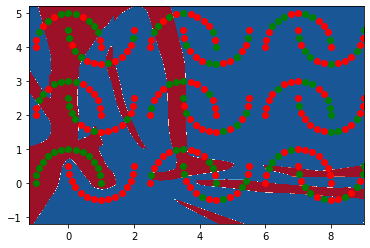

In [28]:
plt.axis([-1.2,9,-1.2,5.2],'equal')
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = 'RdGy' )
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdBu')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1] ,c="red")
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1],c= "green" )

In [29]:
X_test.shape

(270, 2)

In [30]:
testset = Grid_data(X_test,Y_test)
testloader = DataLoader(testset,batch_size=10,shuffle=False)

In [31]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (270,    100 * correct / total))

Accuracy of the network on the 270 train images: 63 %


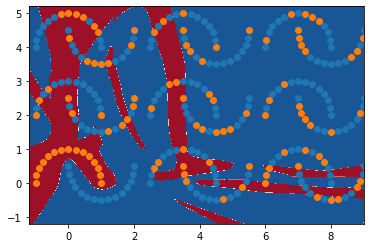

In [32]:
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = "Greys")
plt.axis([-1.2,9,-1.2,5.2],'equal')
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = 'RdGy' )
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdBu')
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] )
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1] )

In [33]:
# X,Y = np.meshgrid(np.arange(-1.1,1.1,0.01),np.arange(-1.1,1.1,0.01))

In [34]:
# X_axis.shape,Y_axis.shape

In [35]:
# plt.contourf(X_axis,Y_axis,np.sign(Z),cmap='RdBu')
